In [2]:
# pip install transformers torch nltk pandas matplotlib seaborn

In [1]:
import pandas as pd
import nltk
from nltk.tokenize import sent_tokenize

In [34]:


# Load the CSV file
df = pd.read_csv("/Users/pandhari/ai-diary-project/Data/diary_dataset.csv")


df["sentences"] = df["Entry"].apply(sent_tokenize)

df = df.explode("sentences").reset_index(drop=True)

In [35]:
df["Date"]

0      2024-01-04 00:00:00
1      2024-01-04 00:00:00
2      2024-01-04 00:00:00
3      2024-01-04 00:00:00
4      2024-02-04 00:00:00
              ...         
124    2024-29-04 00:00:00
125    2024-30-04 00:00:00
126    2024-30-04 00:00:00
127    2024-30-04 00:00:00
128    2024-30-04 00:00:00
Name: Date, Length: 129, dtype: object

In [15]:
# from transformers import pipeline

# # Load the emotion classification model
# emotion_pipeline = pipeline("text-classification", model="j-hartmann/emotion-english-distilroberta-base", top_k=None)

# # Function to extract emotions for a sentence
# def get_emotion_scores(text):
#     results = emotion_pipeline(text)
#     scores = {res["label"]: res["score"] for res in results[0]}
#     return scores

# # Apply to all sentences
# df["emotion_scores"] = df["sentences"].apply(get_emotion_scores)

In [16]:
# from collections import defaultdict

# # Group sentences by date and compute weighted sum
# aggregated_emotions = []

# for date, group in df.groupby("Date"):
#     total_length = sum(len(sent) for sent in group["sentences"])
#     emotion_totals = defaultdict(float)

#     for _, row in group.iterrows():
#         weight = len(row["sentences"]) / total_length  # Weight by sentence length
#         for emotion, score in row["emotion_scores"].items():
#             emotion_totals[emotion] += score * weight  # Weighted sum

#     emotion_totals["Date"] = date
#     aggregated_emotions.append(emotion_totals)

# # Convert to DataFrame
# emotion_df = pd.DataFrame(aggregated_emotions)

In [17]:
# import matplotlib.pyplot as plt
# import seaborn as sns


# # Convert 'date' to datetime format for proper plotting
# emotion_df["Date"] = pd.to_datetime(emotion_df["Date"])
# emotion_df = emotion_df.sort_values("Date")

# # Plot emotion trends
# plt.figure(figsize=(12, 6))
# sns.set_style("whitegrid")

# for emotion in ["anger", "disgust", "fear", "joy", "sadness", "surprise", "neutral"]:
#     sns.lineplot(x="Date", y=emotion, data=emotion_df, label=emotion)

# plt.xlabel("Date")
# plt.ylabel("Emotion Intensity")
# plt.title("Emotion Trends Over Time")
# plt.legend()
# plt.xticks(rotation=45)
# plt.show()

In [18]:
# import matplotlib.pyplot as plt
# import seaborn as sns
# import pandas as pd

# # Ensure correct column name
# if "Date" not in emotion_df.columns:
#     emotion_df.rename(columns={"date": "Date"}, inplace=True)

# # Convert 'Date' to datetime format
# emotion_df["Date"] = pd.to_datetime(emotion_df["Date"], errors="coerce")  
# emotion_df = emotion_df.dropna(subset=["Date"])  # Remove rows with invalid dates
# emotion_df = emotion_df.sort_values("Date")

# # Define emotion categories
# valid_emotions = ["anger", "disgust", "fear", "joy", "sadness", "surprise", "neutral"]
# valid_emotions = [e for e in valid_emotions if e in emotion_df.columns]  # Ensure columns exist

# # Set up the figure with subplots
# fig, axes = plt.subplots(nrows=7, ncols=1, figsize=(12, 20), sharex=True)

# # Plot each sentiment separately
# for i, emotion in enumerate(valid_emotions):
#     sns.lineplot(ax=axes[i], x="Date", y=emotion, data=emotion_df, label=emotion, color=sns.color_palette("tab10")[i])
#     axes[i].set_ylabel("Intensity")
#     axes[i].set_title(f"Emotion Trend: {emotion.capitalize()}")
#     axes[i].legend()
#     axes[i].grid(True)

# # Improve layout
# plt.xlabel("Date")
# plt.xticks(rotation=45)
# plt.tight_layout()
# plt.show()

In [19]:
# import pandas as pd
# import torch
# from transformers import AutoModelForSequenceClassification, AutoTokenizer
# import numpy as np

# # Load the sentiment analysis model
# model_name = "cardiffnlp/twitter-roberta-base-sentiment"
# tokenizer = AutoTokenizer.from_pretrained(model_name)
# model = AutoModelForSequenceClassification.from_pretrained(model_name)
# model.eval()  # Set model to evaluation mode

# # Define label mapping (Negative, Neutral, Positive)
# LABELS = {0: "Negative", 1: "Neutral", 2: "Positive"}

# # Function to calculate sentiment scores
# def get_sentiment_scores(text):
#     if not isinstance(text, str) or text.strip() == "":
#         return {"Positive": 0.0, "Negative": 0.0, "Neutral": 0.0}

#     sentences = text.split(". ")  # Basic sentence splitting
#     sentiment_scores = {"Positive": 0.0, "Negative": 0.0, "Neutral": 0.0}

#     for sentence in sentences:
#         inputs = tokenizer(sentence, return_tensors="pt", truncation=True, padding=True, max_length=512)
#         with torch.no_grad():
#             outputs = model(**inputs)
#         probs = torch.nn.functional.softmax(outputs.logits, dim=-1).squeeze()

#         # Weighted sum approach
#         sentiment_scores["Negative"] += probs[0].item()
#         sentiment_scores["Neutral"] += probs[1].item()
#         sentiment_scores["Positive"] += probs[2].item()

#     # Normalize scores
#     total = sum(sentiment_scores.values())
#     if total > 0:
#         for key in sentiment_scores:
#             sentiment_scores[key] /= total  # Convert to proportion

#     return sentiment_scores

# # Load diary dataset
# emotion_df = pd.read_csv("/Users/pandhari/ai-diary-project/Data/diary.csv")

# # Calculate sentiment scores for each diary entry
# sentiment_data = emotion_df["Entry"].apply(get_sentiment_scores)

# # Convert dictionary results into separate columns
# sentiment_df = pd.DataFrame(sentiment_data.tolist())

# # Merge back into original dataframe
# emotion_df = pd.concat([emotion_df, sentiment_df], axis=1)

# # Save results
# emotion_df.to_csv("diary_with_sentiment_scores.csv", index=False)

# # Show sample data
# emotion_df

In [36]:
df

,Date,Entry,sentences
0,2024-01-04 00:00:00,"The day started like any other. Woke up, had m...",The day started like any other.
1,2024-01-04 00:00:00,"The day started like any other. Woke up, had m...","Woke up, had my usual coffee, and went about m..."
2,2024-01-04 00:00:00,"The day started like any other. Woke up, had m...",Work was neither too stressful nor too excitin...
3,2024-01-04 00:00:00,"The day started like any other. Woke up, had m...","Even the evening felt routine, with dinner, a ..."
4,2024-02-04 00:00:00,Met an old friend unexpectedly at a cafe. We h...,Met an old friend unexpectedly at a cafe.
...,...,...,...
124,2024-29-04 00:00:00,"My last day here, and I’m already wishing I ha...",Leaving with a heart full of memories.
125,2024-30-04 00:00:00,It’s funny looking back at these last 30 days....,It’s funny looking back at these last 30 days.
126,2024-30-04 00:00:00,It’s funny looking back at these last 30 days....,"So many small moments, so many emotions."
127,2024-30-04 00:00:00,It’s funny looking back at these last 30 days....,"Life really is a mix of everything, isn’t it?"


In [37]:
import pandas as pd
import torch
from transformers import AutoModelForSequenceClassification, AutoTokenizer
import numpy as np

# Load the emotion analysis model
emotion_model_name = "j-hartmann/emotion-english-distilroberta-base"
emotion_tokenizer = AutoTokenizer.from_pretrained(emotion_model_name)
emotion_model = AutoModelForSequenceClassification.from_pretrained(emotion_model_name)
emotion_model.eval()  

# Load the sentiment analysis model
sentiment_model_name = "cardiffnlp/twitter-roberta-base-sentiment"
sentiment_tokenizer = AutoTokenizer.from_pretrained(sentiment_model_name)
sentiment_model = AutoModelForSequenceClassification.from_pretrained(sentiment_model_name)
sentiment_model.eval()  

# Define emotion labels from model
EMOTION_LABELS = ["anger", "disgust", "fear", "joy", "sadness", "surprise", "neutral"]
SENTIMENT_LABELS = ["Negative", "Neutral", "Positive"]

# Function to calculate emotion scores
def get_emotion_scores(text):
    if not isinstance(text, str) or text.strip() == "":
        return {label: 0.0 for label in EMOTION_LABELS}

    sentences = text.split(". ")  
    emotion_scores = {label: 0.0 for label in EMOTION_LABELS}

    for sentence in sentences:
        inputs = emotion_tokenizer(sentence, return_tensors="pt", truncation=True, padding=True, max_length=512)
        with torch.no_grad():
            outputs = emotion_model(**inputs)
        probs = torch.nn.functional.softmax(outputs.logits, dim=-1).squeeze()

        for i, label in enumerate(EMOTION_LABELS):
            emotion_scores[label] += probs[i].item()

    total = sum(emotion_scores.values())
    if total > 0:
        for key in emotion_scores:
            emotion_scores[key] /= total  

    return emotion_scores

# Function to calculate sentiment scores
def get_sentiment_scores(text):
    if not isinstance(text, str) or text.strip() == "":
        return {label: 0.0 for label in SENTIMENT_LABELS}

    sentences = text.split(". ")  
    sentiment_scores = {label: 0.0 for label in SENTIMENT_LABELS}

    for sentence in sentences:
        inputs = sentiment_tokenizer(sentence, return_tensors="pt", truncation=True, padding=True, max_length=512)
        with torch.no_grad():
            outputs = sentiment_model(**inputs)
        probs = torch.nn.functional.softmax(outputs.logits, dim=-1).squeeze()

        for i, label in enumerate(SENTIMENT_LABELS):
            sentiment_scores[label] += probs[i].item()

    total = sum(sentiment_scores.values())
    if total > 0:
        for key in sentiment_scores:
            sentiment_scores[key] /= total  

    return sentiment_scores

# Load diary dataset
emotion_df = pd.read_csv("/Users/pandhari/ai-diary-project/Data/diary_dataset.csv")

# Calculate emotion and sentiment scores for each diary entry
emotion_data = emotion_df["Entry"].apply(get_emotion_scores)
sentiment_data = emotion_df["Entry"].apply(get_sentiment_scores)

# Convert dictionary results into separate columns
emotion_df = pd.concat([emotion_df, pd.DataFrame(emotion_data.tolist())], axis=1)
emotion_df = pd.concat([emotion_df, pd.DataFrame(sentiment_data.tolist())], axis=1)

# Save results
emotion_df.to_csv("diary_with_emotions_and_sentiments.csv", index=False)

# Show sample data
emotion_df.head()

/opt/anaconda3/envs/ai_diary/lib/python3.10/site-packages/huggingface_hub/file_download.py:795: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


,Date,Entry,anger,disgust,fear,joy,sadness,surprise,neutral,Negative,Neutral,Positive
0,2024-01-04 00:00:00,"The day started like any other. Woke up, had m...",0.013536,0.016970,0.202263,0.155931,0.433037,0.096590,0.081673,0.029530,0.445176,0.525295
1,2024-02-04 00:00:00,Met an old friend unexpectedly at a cafe. We h...,0.005978,0.014595,0.022708,0.491381,0.224240,0.083094,0.158005,0.116023,0.292049,0.591928
2,2024-03-04 00:00:00,Received a random package at my doorstep. Turn...,0.012477,0.015131,0.006235,0.398032,0.272203,0.008742,0.287180,0.102522,0.363653,0.533825
3,2024-04-04 00:00:00,"Saw an old picture today, and it brought back ...",0.003435,0.022892,0.007468,0.009048,0.030076,0.342543,0.584539,0.313519,0.551199,0.135282
4,2024-05-04 00:00:00,Had an amazing workout today—one of those days...,0.002323,0.001805,0.001514,0.882029,0.014666,0.003180,0.094483,0.001635,0.015226,0.983139


In [43]:
emotion_df["Date"]

0     2024-01-04 00:00:00
1     2024-02-04 00:00:00
2     2024-03-04 00:00:00
3     2024-04-04 00:00:00
4     2024-05-04 00:00:00
5     2024-06-04 00:00:00
6     2024-07-04 00:00:00
7     2024-08-04 00:00:00
8     2024-09-04 00:00:00
9     2024-10-04 00:00:00
10    2024-11-04 00:00:00
11    2024-12-04 00:00:00
12    2024-13-04 00:00:00
13    2024-14-04 00:00:00
14    2024-15-04 00:00:00
15    2024-16-04 00:00:00
16    2024-17-04 00:00:00
17    2024-18-04 00:00:00
18    2024-19-04 00:00:00
19    2024-20-04 00:00:00
20    2024-21-04 00:00:00
21    2024-22-04 00:00:00
22    2024-23-04 00:00:00
23    2024-24-04 00:00:00
24    2024-25-04 00:00:00
25    2024-26-04 00:00:00
26    2024-27-04 00:00:00
27    2024-28-04 00:00:00
28    2024-29-04 00:00:00
29    2024-30-04 00:00:00
Name: Date, dtype: object

In [40]:
import pandas as pd

# Load data
emotion_df = pd.read_csv("/Users/pandhari/ai-diary-project/Sentiment_Analysis/diary_with_emotions_and_sentiments.csv")

# Step 1: Inspect Date Column for Issues
print(emotion_df.columns)
print(emotion_df["Date"].head())  # Check a few value

# Step 2: Handle Missing or Corrupt Dates
emotion_df["Date"] = pd.to_datetime(
    emotion_df["Date"], errors="coerce"
)  # 'coerce' will turn invalid values into NaT

# Step 3: Drop Rows Where Date Conversion Failed
emotion_df = emotion_df.dropna(subset=["Date"])

# Step 4: Sort Values by Date
emotion_df = emotion_df.sort_values("Date")

# Save cleaned file (optional)
emotion_df.to_csv("cleaned_diary.csv", index=False)

print("✅ Date column cleaned and converted successfully!")

Index(['Date', 'Entry', 'anger', 'disgust', 'fear', 'joy', 'sadness',
       'surprise', 'neutral', 'Negative', 'Neutral', 'Positive'],
      dtype='object')
0    2024-01-04 00:00:00
1    2024-02-04 00:00:00
2    2024-03-04 00:00:00
3    2024-04-04 00:00:00
4    2024-05-04 00:00:00
Name: Date, dtype: object
✅ Date column cleaned and converted successfully!


In [41]:
emotion_df.shape

(12, 12)

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Load processed data
emotion_df = pd.read_csv("/Users/pandhari/ai-diary-project/Sentiment_Analysis/diary_with_emotions_and_sentiments.csv")

# Convert 'Date' to datetime format
emotion_df["Date"] = pd.to_datetime(emotion_df["Date"])

# Sort by date
emotion_df = emotion_df.sort_values("Date")

# Rolling average to smooth the plots
rolling_window = 7  # You can adjust this
emotion_df_rolling = emotion_df.copy()
emotion_cols = ["anger", "disgust", "fear", "joy", "sadness", "surprise", "neutral"]
sentiment_cols = ["Negative", "Neutral", "Positive"]

for col in emotion_cols + sentiment_cols:
    emotion_df_rolling[col] = emotion_df[col].rolling(rolling_window, min_periods=1).mean()

# Plot each emotion separately
plt.figure(figsize=(12, 10))
sns.set_style("whitegrid")

for i, emotion in enumerate(emotion_cols):
    plt.subplot(4, 2, i + 1)
    sns.lineplot(x="Date", y=emotion, data=emotion_df_rolling, label=emotion, linewidth=2)
    plt.title(f"{emotion.capitalize()} Over Time")
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

# Plot Sentiment Scores Separately
plt.figure(figsize=(10, 5))

for sentiment in sentiment_cols:
    sns.lineplot(x="Date", y=sentiment, data=emotion_df_rolling, label=sentiment, linewidth=2)

plt.xlabel("Date")
plt.ylabel("Sentiment Score")
plt.title("Overall Sentiment Over Time")
plt.legend()
plt.xticks(rotation=45)
plt.show()

# Heatmap of Emotions
plt.figure(figsize=(12, 6))
sns.heatmap(emotion_df_rolling.set_index("Date")[emotion_cols].T, cmap="coolwarm", annot=False)
plt.title("Emotion Intensity Heatmap Over Time")
plt.xlabel("Date")
plt.ylabel("Emotions")
plt.xticks(rotation=45)
plt.show()

ValueError: time data "2024-13-04 00:00:00" doesn't match format "%Y-%m-%d %H:%M:%S", at position 12. You might want to try:
    - passing `format` if your strings have a consistent format;
    - passing `format='ISO8601'` if your strings are all ISO8601 but not necessarily in exactly the same format;
    - passing `format='mixed'`, and the format will be inferred for each element individually. You might want to use `dayfirst` alongside this.

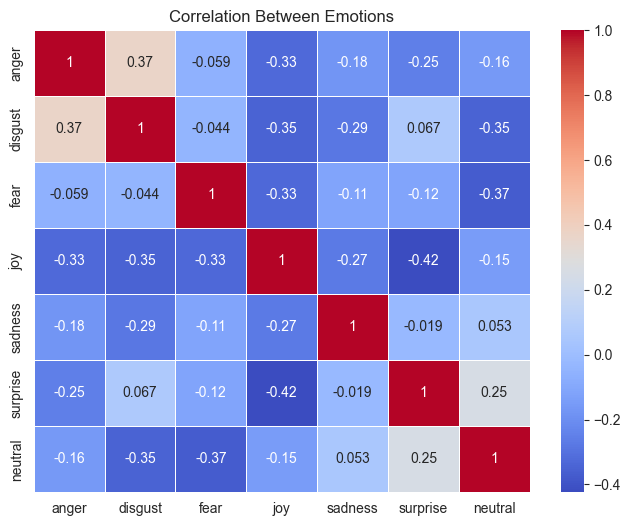

In [28]:
plt.figure(figsize=(8, 6))
sns.heatmap(emotion_df[emotion_cols].corr(), annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Between Emotions")
plt.show()

In [30]:
!pip install wordcloud


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


No significant entries found for anger. Skipping word cloud.


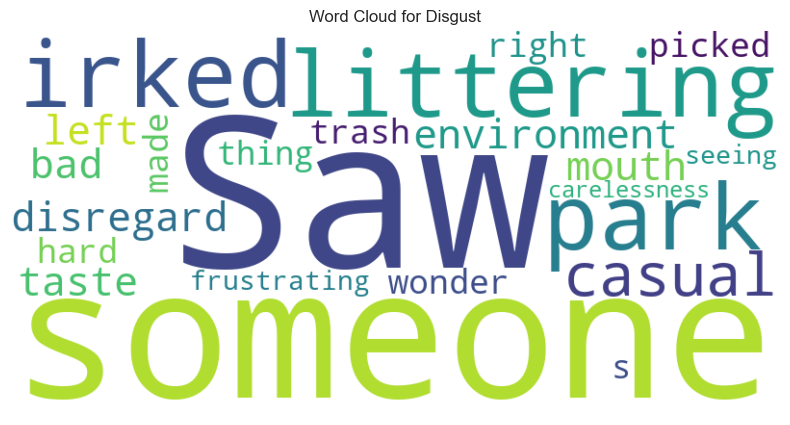

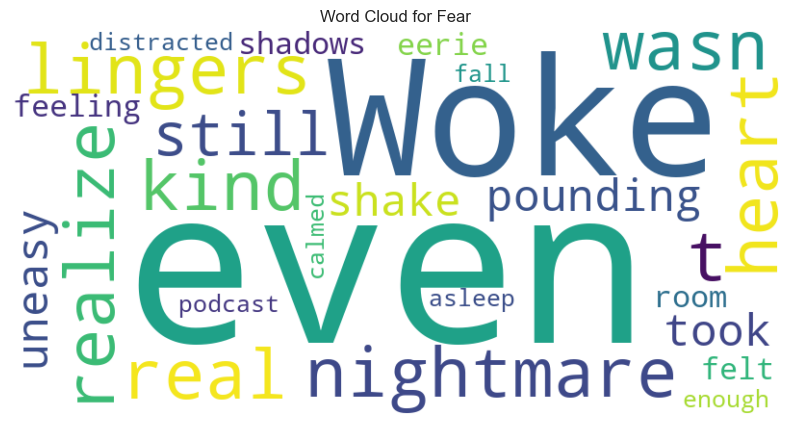

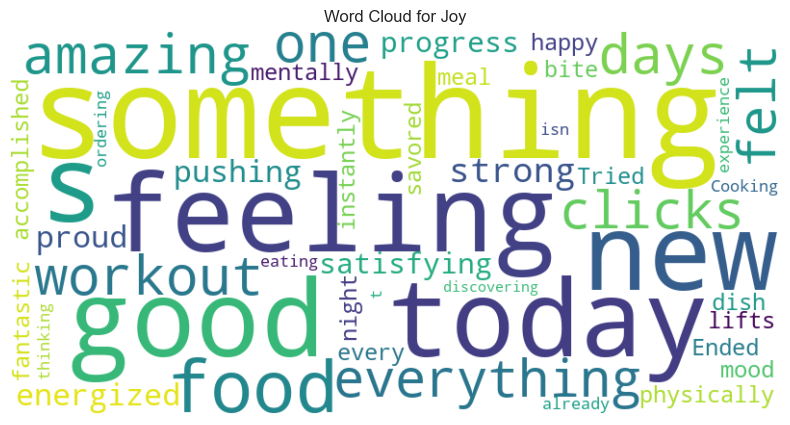

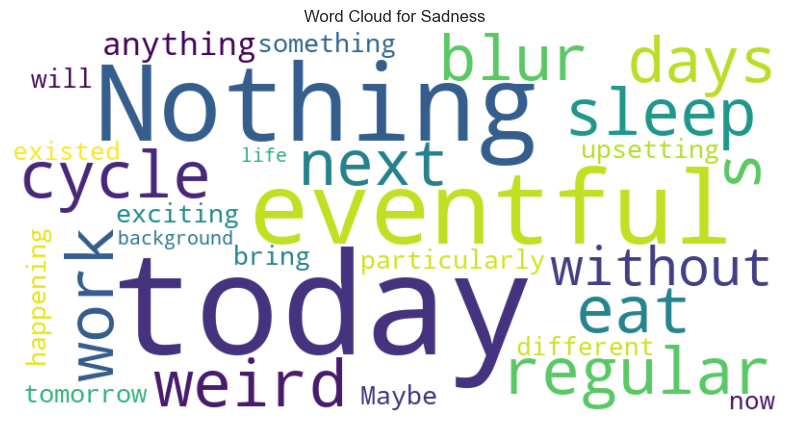

No significant entries found for surprise. Skipping word cloud.
No significant entries found for neutral. Skipping word cloud.


In [33]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

for emotion in emotion_cols:
    # Filter diary entries where the emotion is strong (> 0.5)
    filtered_entries = emotion_df[emotion_df[emotion] > 0.5]["Entry"]

    # Join entries into a single text string
    text = " ".join(filtered_entries.dropna())  # Drop NaN values if any

    # Check if text is empty before generating a word cloud
    if text.strip():
        wordcloud = WordCloud(width=800, height=400, background_color="white").generate(text)

        plt.figure(figsize=(10, 5))
        plt.imshow(wordcloud, interpolation="bilinear")
        plt.axis("off")
        plt.title(f"Word Cloud for {emotion.capitalize()}")
        plt.show()
    else:
        print(f"No significant entries found for {emotion}. Skipping word cloud.")